# MMIK - Laboratorium 5
## Paweł Maczuga

In [33]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [34]:
def decrement(qc):
    qc.x(2)
    qc.x(1)
    qc.ccx(2, 1, 0)
    qc.x(1)
    qc.cx(2, 1)
    qc.x(2)

In [35]:
def increment(qc):
    qc.ccx(2, 1, 0)
    qc.cx(2, 1)

In [36]:
def random_steps(qc, steps=1):
    for i in range(steps):
        qc.h(2)
        increment(qc)
        decrement(qc)

# Sprawdzenie poprawności wyliczeń

In [63]:
backend = Aer.get_backend('statevector_simulator')

for i in range(1, 4):
    circ = QuantumCircuit(3)
    random_steps(circ, i)
    job = execute(circ, backend)
    result = job.result()
    outputstate = result.get_statevector(circ, decimals=3)
    print("{} steps".format(i))
    print("\n".join(list(map(lambda x: "{0:03b}: p = {1}".format(x[0], (x[1])**2), enumerate(outputstate)))))
    print()

1 steps
000: p = 0j
001: p = 0j
010: p = 0j
011: p = (0.49984899999999993+0j)
100: p = 0j
101: p = 0j
110: p = (0.49984899999999993+0j)
111: p = 0j

2 steps
000: p = (0.25-0j)
001: p = (0.25+0j)
010: p = 0j
011: p = 0j
100: p = (0.25+0j)
101: p = (0.25-0j)
110: p = 0j
111: p = 0j

3 steps
000: p = 0j
001: p = 0j
010: p = 0j
011: p = (0.49984899999999993-0j)
100: p = 0j
101: p = 0j
110: p = 0j
111: p = (0.49984899999999993-0j)



In [50]:
def run_steps_with_backend(steps, backend):
    counts = []
    legend = []

    for i in range(1, steps + 1):
        circ = QuantumCircuit(3)
        random_steps(circ, i)
        meas = QuantumCircuit(3, 3)
        meas.barrier(range(3))
        meas.measure(range(3),range(3))
        qc = circ+meas
        job_sim = execute(qc, backend, shots=1024)
        result_sim = job_sim.result()
        counts.append(result_sim.get_counts(qc))
        legend.append("{} steps".format(i, i))
    return counts, legend

# Symulator

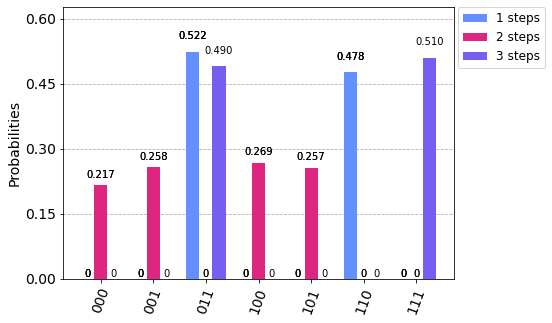

In [64]:
backend_sim = Aer.get_backend('qasm_simulator')
counts_sim, legend_sim = run_steps_with_backend(3, backend_sim)
plot_histogram(counts_sim, legend=legend_sim)

# Prawdziwa maszyna

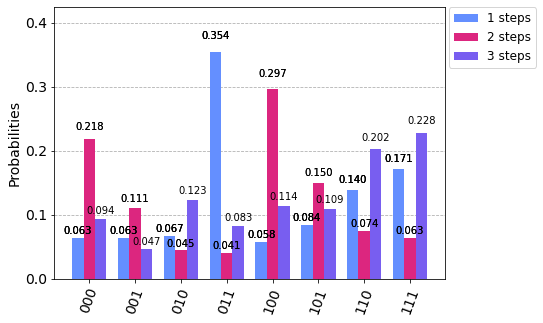

In [53]:
backend = provider.get_backend('ibmq_essex')
counts, legend = run_steps_with_backend(3, backend)
plot_histogram(counts, legend=legend)

## Odwrotnie - po krokach

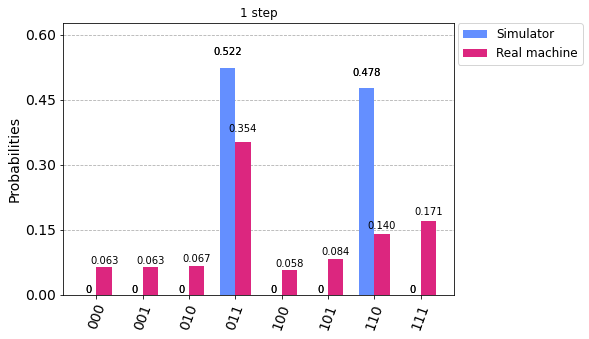

In [67]:
plot_histogram([counts_sim[0], counts[0]], legend=["Simulator", "Real machine"], title="1 step")

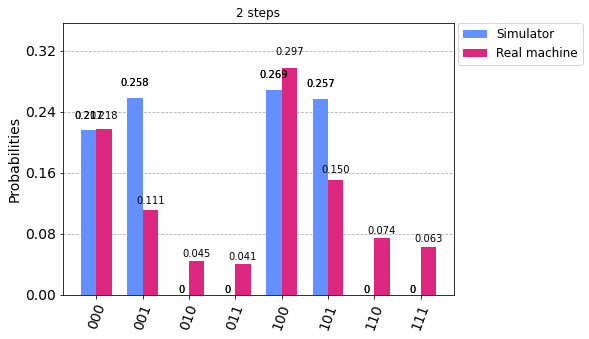

In [68]:
plot_histogram([counts_sim[1], counts[1]], legend=["Simulator", "Real machine"], title="2 steps")

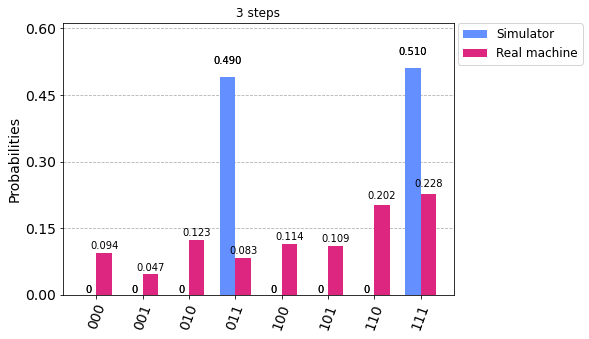

In [69]:
plot_histogram([counts_sim[2], counts[2]], legend=["Simulator", "Real machine"], title="3 steps")

Po trzech krokach histogram rzeczywistej maszyny w ogóle nie przypomine tego z symulacji